# Exercise 1: MD simulations of LJ-Ag

## SVOLGIMENTO PUNTO 2

---

## Consegna

### Parametri

In all simulations model Ag interatomic interactions using the LJ potential ($\varepsilon = 0.345$ eV and $\sigma = 2.644$ Å) with the cutoff radius at $R_C = 4.5$ Å. Assume $t_\text{th} = 3$ ps as thermalization time and use the simulation cell of 256-atoms (file `fcc100a256.txt` on the elearning page) unless stated differently. From point 3,

### Punto 1 ✅

Use a **sharp-cutoff** (no polynomial junction) approach and find the optimal timestep to perform a simulation from an initial temperature $T_\text{ini} = 50$ K. The optimal timestep is the maximum one such that $\frac{\delta E}{E} < 10^{−5}$. Consider the range 1, 25 fs and perform 5000 integration steps for each trial. Repeat the analysis for $T_\text{ini} = 500$ K and show that the criterion cannot be fulfilled however reducing the timestep.

#### Dall'analisi

Risulta un $dt$ minimo di 20 fs

### Punto 2 ⚒️

Implement a **7-degree polynomial** junction for $R_P < r < R_C$ with $R_P = 4.2$ Å. Use the coefficients $A, B, \dots, H$ for the 0th, 1st, ..., 7th degree term respectively, as provided in the file `poly7.py` on the elearning page. Adapt the definition of forces accordingly. Check that for $T_\text{ini} = 50$ K the simulation is consistent with the sharp-cutoff one and find the optimal timestep for $T_\text{ini} = 500$ K, $1000$ K and $2000$ K.

### Punto 3 🔜

For the following points, implement a steepest-descent procedure to start the simulation from a minimum energy configuration (use C= 0.005 Å/𝑒𝑉 and stop when the maximum force falls below 0.001 𝑒𝑉/Å).


Using the optimal timesteps found in point 2, perform 10 𝑝𝑠 long simulations for $T_\text{ini} = 500$ K, $1000$ K and $2000$ K. Plot $\langle T \rangle$ as a function of $T_\text{ini}$ , check if the condition $\langle T \rangle = \frac{T_\text{ini}}{2}$ is
fulfilled and explain the result. Visualize the atomic trajectories of the atoms at the center of the
cluster and at the cube vertices for both the lowest and highest temperature and comment on
their difference.

---

## Svolgimento PUNTO 2

### 0) Importazioni e dati

In [1]:
import numpy as np
from CMS.MolecularDynamics import CrystalStructure as Crystal
from CMS.MolecularDynamics import CrystalDynamics as Dynamics

In [2]:
# Nome del file (numero di atomi da studiare: 256)
filename = '../../../data/pos-fcc100-random/fcc100a256.txt'

#### Dati globali

In [3]:
# massa atomica dell'atomo considerato (argento)
silver_mass = 108

# range 1-25 fs per il time step
time_steps_50 = np.arange(1e-15, 25e-15, 1e-15)
time_steps_others = np.arange(1e-15, 10e-15, 1e-15) # inutile a T alte usare time step grandi

# 5000 step per ogni simulazione
n_steps = 5000

# tempo di termalizzazione (ogni valore precedente va buttato)
t_th = 3e-12

# raggi di cutoff e giunzione polinomiale
R_C = 4.5
R_P = 4.2

### 1) Consistenza di T=50K e optimal timestep

#### 1.1) Dati

In [4]:
# temperature iniziali da studiare
T_ini_punto_2_1 = [50]

#### 1.2) Mostro che T=50K con giunzione polinomica è consistente

In [5]:
# Raccolgo le energie medie e le dev std
E_tot_means = {}
E_tot_stds = {}

E_tot_list = {}
E_k_list = {}
T_list = {}

for T in T_ini_punto_2_1: # in realtà una sola T iniziale: 50 K
    print(f"\n=== Simulazioni per temperatura iniziale T = {T} K ===")
    
    E_tot_means[T] = []
    E_tot_stds[T] = []
    
    E_tot_list[T] = []
    E_k_list[T] = []
    T_list[T] = []
        
    for dt in time_steps_50: # venticinque time step diversi
        # Ogni volta inizializzo da capo il cristallo
        cristallo = Crystal.from_file(filename)
        # setto il raggio di cutoff E la giunzione polinomiale
        cristallo.set_R_C(R_C) 
        cristallo.set_R_P(R_P)
        
        # PROVO A SETTARE ANCHE UN R_V PER LA VERLET CAGE
        R_V = R_C + 0.5
        #cristallo.set_R_V(R_V)
    
        print(f"\n--- Simulazione con dt = {dt} s, n_steps = {n_steps} ---")
        simulazione = Dynamics(cristallo, atomic_mass=silver_mass, dt=dt, temp_ini=T)
        simulazione.set_seed(12316543)
        meta_E_tot, meta_E_k, meta_T = simulazione.run_dynamics(n_steps=n_steps, t_th=t_th, output=False, debug=False)
        
        E_tot_means[T].append(np.mean(meta_E_tot))
        E_tot_stds[T].append(np.std(meta_E_tot))
        
        E_tot_list[T].append(meta_E_tot)
        E_k_list[T].append(meta_E_k)
        T_list[T].append(meta_T)


=== Simulazioni per temperatura iniziale T = 50 K ===

--- Simulazione con dt = 1e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 2e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 3.0000000000000002e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 4e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 5.000000000000001e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 6.0000000000000005e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 7e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 8

#### 1.3) Analisi e plot

Grafico $\delta E/\langle E\rangle$ vs dt

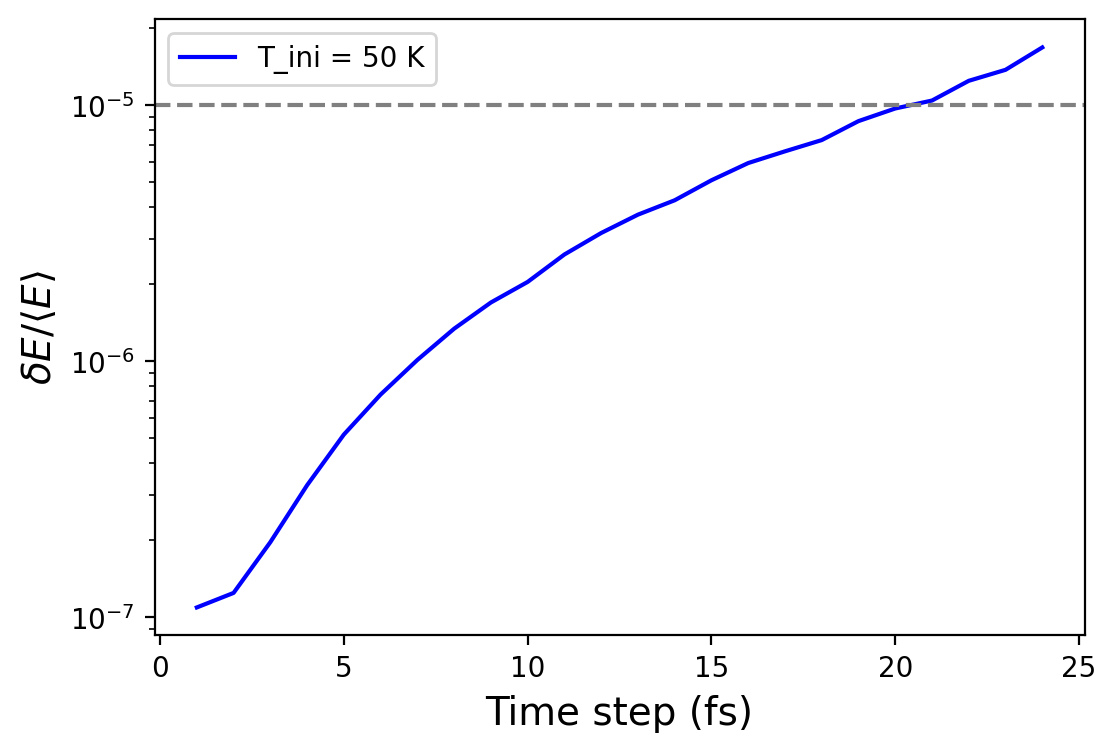

In [6]:
import matplotlib.pyplot as plt

rapporti = {}
colors = ['blue', 'red', 'green', 'orange']

for i, T in enumerate(T_ini_punto_2_1):
    rapporto = np.array(E_tot_stds[T])/np.abs(np.array(E_tot_means[T]))
    rapporti[T] = rapporto
    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(time_steps_50*1e15, rapporto, color=colors[i], label=f'T_ini = {T} K')
    plt.axhline(y=1e-5, color='gray', linestyle='--')
    plt.xlabel('Time step (fs)', fontsize=14)
    plt.ylabel(r'$\delta E/\langle E \rangle$', fontsize=14)
    plt.yscale('log')
    plt.legend()
    plt.show()

In [7]:
# prendo l'ultimo rapporto minore di 1e-5 per ogni temperatura
for T in T_ini_punto_2_1:
    indice_ultimo = -1
    rapporto = rapporti[T]
    for i, val in enumerate(rapporto):
        if val < 1e-5:
            indice_ultimo = i
            
    if i != -1:
        print(f"\nPer T_ini = {T} K, l'ultimo rapporto < 1e-5 è a dt = {time_steps_50[indice_ultimo]*1e15} fs con rapporto = {rapporto[indice_ultimo]}")
    else:   
        print(f"\nPer T_ini = {T} K, non esiste un rapporto < 1e-5 nei time step considerati.")


Per T_ini = 50 K, l'ultimo rapporto < 1e-5 è a dt = 20.000000000000004 fs con rapporto = 9.730374685745299e-06


**OSSERVAZIONE** Consistente con quanto visto al punto 1 con lo sharp cutoff!

### 2) Timestep ottimale per T = 500, 1000, 2000

#### 2.1) Dati

In [8]:
# temperature iniziali da studiare
T_ini_punto_2_2 = [500, 1000, 1700, 2000]

#### 2.2) Simulazioni per T = 500, 1000, 1700, 2000 K

In [9]:
# Raccolgo le energie medie e le dev std nei dict di prima

for T in T_ini_punto_2_2: 
    print(f"\n=== Simulazioni per temperatura iniziale T = {T} K ===")
    
    E_tot_means[T] = []
    E_tot_stds[T] = []
    
    E_tot_list[T] = []
    E_k_list[T] = []
    T_list[T] = []
        
    for dt in time_steps_others: # venticinque time step diversi
        # Ogni volta inizializzo da capo il cristallo
        cristallo = Crystal.from_file(filename)
        # setto il raggio di cutoff E la giunzione polinomiale
        cristallo.set_R_C(R_C)
        cristallo.set_R_P(R_P)
        
        # PROVO A SETTARE ANCHE UN R_V PER LA VERLET CAGE
        R_V = R_C + 0.5
        cristallo.set_R_V(R_V)
    
        print(f"\n--- Simulazione con dt = {dt} s, n_steps = {n_steps} ---")
        simulazione = Dynamics(cristallo, atomic_mass=silver_mass, dt=dt, temp_ini=T)
        simulazione.set_seed(1543) # 12316543
        meta_E_tot, meta_E_k, meta_T = simulazione.run_dynamics(n_steps=n_steps, t_th=t_th, output=False, debug=False)
        
        E_tot_means[T].append(np.mean(meta_E_tot))
        E_tot_stds[T].append(np.std(meta_E_tot))
        
        E_tot_list[T].append(meta_E_tot)
        E_k_list[T].append(meta_E_k)
        T_list[T].append(meta_T)


=== Simulazioni per temperatura iniziale T = 500 K ===

--- Simulazione con dt = 1e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 2e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 3.0000000000000002e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 4e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 5.000000000000001e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 6.0000000000000005e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 7e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 

#### 2.3) Analisi e plot

Grafico $\delta E/\langle E\rangle$ vs dt

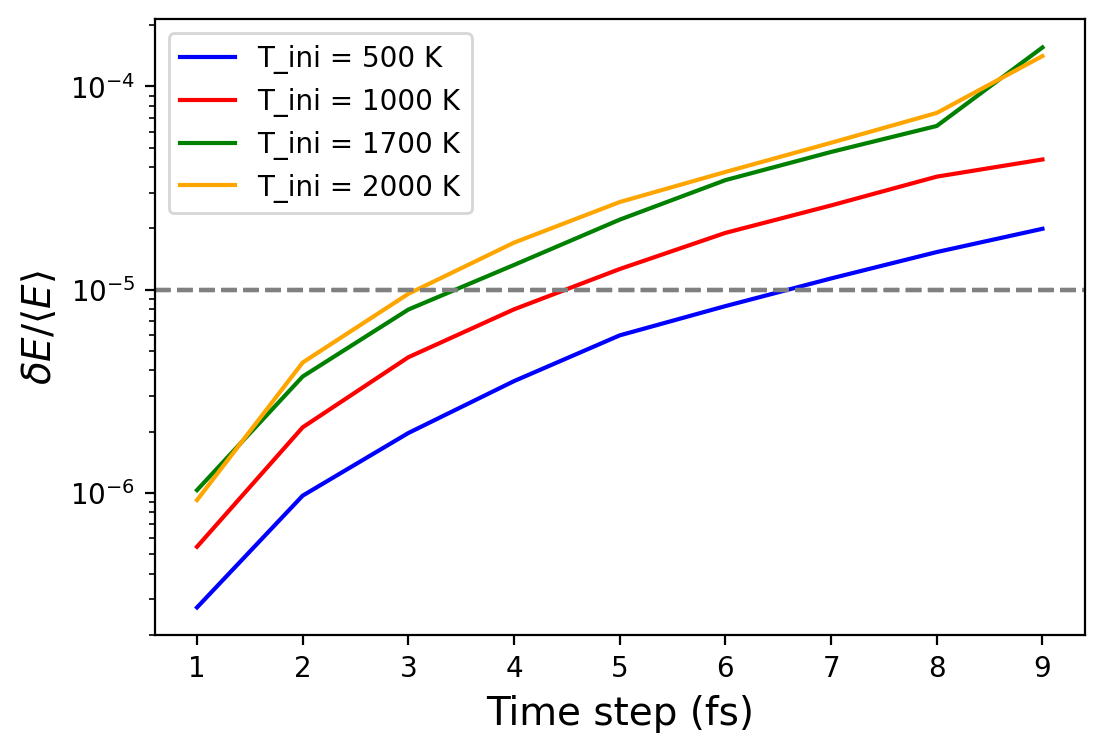

In [10]:
plt.figure(figsize=(6,4), dpi=200)
for i, T in enumerate(T_ini_punto_2_2):
    rapporto = np.array(E_tot_stds[T])/np.abs(np.array(E_tot_means[T]))
    rapporti[T] = rapporto
    plt.plot(time_steps_others*1e15, rapporto, color=colors[i], label=f'T_ini = {T} K')
    # linea orizzontale a y=1e-5
    plt.axhline(y=1e-5, color='gray', linestyle='--')
plt.xlabel('Time step (fs)', fontsize=14)
plt.ylabel(r'$\delta E/\langle E \rangle$', fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

In [11]:
# prendo l'ultimo rapporto minore di 1e-5 per ogni temperatura
for T in T_ini_punto_2_2:
    indice_ultimo = -1
    rapporto = rapporti[T]
    for i, val in enumerate(rapporto):
        if val < 1e-5:
            indice_ultimo = i
            
    if i != -1:
        print(f"\nPer T_ini = {T} K, l'ultimo rapporto < 1e-5 è a dt = {time_steps_others[indice_ultimo]*1e15} fs con rapporto = {rapporto[indice_ultimo]}")
    else:   
        print(f"\nPer T_ini = {T} K, non esiste un rapporto < 1e-5 nei time step considerati.")


Per T_ini = 500 K, l'ultimo rapporto < 1e-5 è a dt = 6.000000000000001 fs con rapporto = 8.295524213038039e-06

Per T_ini = 1000 K, l'ultimo rapporto < 1e-5 è a dt = 4.0 fs con rapporto = 7.998280814652697e-06

Per T_ini = 1700 K, l'ultimo rapporto < 1e-5 è a dt = 3.0000000000000004 fs con rapporto = 7.979429094179597e-06

Per T_ini = 2000 K, l'ultimo rapporto < 1e-5 è a dt = 3.0000000000000004 fs con rapporto = 9.535634071446547e-06
